# Descriptive Statistics Problems

## Exercise 1 – How long are movie titles?

In this exercise, you will apply descriptive statistics techniques to a real dataset: a database of 1000 popular movies from the IMDb website.

From the title of each movie, you will:
- Calculate the title length (in characters).
- Obtain key statistical metrics: mean, median, mode, range, variance, standard deviation, skewness, and kurtosis.
- Identify the longest and shortest titles.
- Visualize the distribution of these lengths with a histogram and a density curve.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Load IMDb dataset
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


In [3]:
# Remember to find two ways to solve each exercise
# Create a new column called 'title_length' with the length (number of characters) of each title


df['title_length'] = df['title'].str.len()
df

#other way: create series with for loop of length, define column

,star_rating,title,content_rating,genre,duration,actors_list,title_length
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",24
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",13
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",22
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",15
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",12
...,...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",7
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",27
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",47
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr...",11


In [5]:
# Calculate mean, median, and mode of the 'title_length' column
title_mean = df['title_length'].mean()
title_median = np.median(df['title_length']) # or df['title_length'].median()
title_mode =  df['title_length'].mode()[0] # or mode(df['title_length'])

print(f"The mean of the length of movie titles is: {round(title_mean)}, the median is: {round(title_median)}, and the mode is: {title_mode}")

The mean of the length of movie titles is: 15, the median is: 14, and the mode is: 12


In [7]:
# Calculate the range, variance, and standard deviation of 'title_length'
title_range = (df['title_length'].max() - df['title_length'].min())
title_variance = np.var(df['title_length'])
title_std = np.std(df['title_length'])
print(f"The range of the data is: {title_range}, the variance is {round(title_variance, 2)}, and the standard deviation is {round(title_std, 2)}")

The range of the data is: 67, the variance is 72.03, and the standard deviation is 8.49


In [19]:
# Calculate skewness and kurtosis of the 'title_length' column
skewness = df['title_length'].skew()
kurt = df['title_length'].kurt()

In [20]:
# Print the shortest and longest title based on their length
print(f"The longest movie title is {df['title'][df['title_length'].idxmax()]} and the shortest movie title is {df['title'][df['title_length'].idxmin()]}")

The longest movie title is Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb and the shortest movie title is M


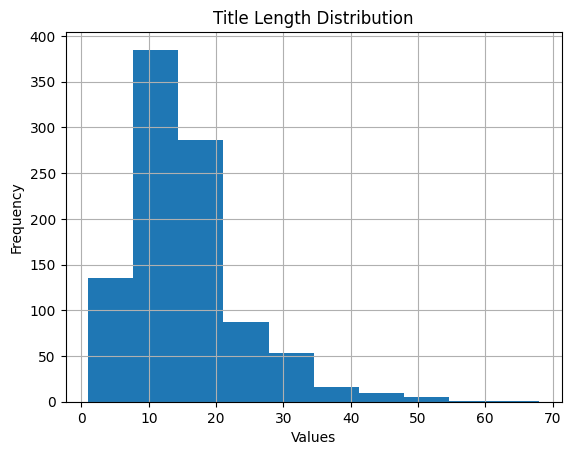

In [23]:
# plot your results
df['title_length'].hist(bins=10)
plt.title('Title Length Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

---

## Exercise 2 – Manual Calculation of Standard Deviation

In this exercise, you will manually calculate the standard deviation by selecting five actual titles from the movie dataset you loaded earlier.


In [24]:
# Create a list with 5 actual values from df['title_length'], for example: [10, 13, 14, 18, 22]
my_list = [10, 13, 14, 18, 22]

In [29]:
# Calculate the mean of the 5 values
my_mean = np.mean(my_list)
my_mean

np.float64(15.4)

In [35]:
# Calculate the squared differences with respect to the mean
diffs = (my_list - my_mean)**2
sum_diffs = sum(diffs)
sum_diffs

np.float64(87.19999999999999)

In [36]:
import math

In [37]:
# Calculate the variance (average of the squared differences) and its square root to obtain the standard deviation
my_var = sum_diffs/5
my_std = math.sqrt(my_var)
my_std

4.176122603564219